<a href="https://colab.research.google.com/github/mayank1729/tuberculosis-drug-resistance-classification/blob/master/chi_squared_feature_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [235]:
#Upload the dataset here
from google.colab import files
uploaded = files.upload()

Saving X_trainData_column_modified_STR.csv to X_trainData_column_modified_STR.csv


In [236]:
import io
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['X_trainData_column_modified_STR.csv'])) #Enter the file name here.
# Dataset is now stored in a Pandas Dataframe

In [237]:
df

,DEL_CF_410280_d918T_307_iniB,DEL_CF_4408101_d102C_34_gid,DEL_F_4408101_d101C_gid_G34G,INS_CF_4242820_i2957G_986_embC,INS_F_409772_i410ATCT_iniB_G137G,INS_F_4247020_i506CC_embB_G169G,INS_F_4247970_i1456GT_embB_G486G,INS_N_4243642_i409GTCCCGGGGCGCCAC_embA_S137S,INS_P_3074519_G.117_thyA,INS_P_3074521_G.115_thyA,SNP_CN_1673449_A10C_T4P_fabG1,SNP_CN_1674263_T62C_I21T_inhA,SNP_CN_1674481_T280G_S94A_inhA,SNP_CN_1674952_C751G_P251A_inhA,SNP_CN_2102891_A152G_F51S_ndh,SNP_CN_2102990_A53G_V18A_ndh,SNP_CN_2154613_TC_katG_Q500R,SNP_CN_2154724_C1388A_R463L_katG,SNP_CN_2155167_GT_katG_S315R,SNP_CN_2155168_C944G_S315T_katG,SNP_CN_2155168_C944T_S315N_katG,SNP_CN_2155276_CT_katG_G279D,SNP_CN_2289040_AC_pncA_W68G,SNP_CN_2289090_TC_pncA_H51R,SNP_CN_2289099_TG_pncA_K48T,SNP_CN_2289180_A62C_V21G_pncA,SNP_CN_2289202_A40G_C14R_pncA,SNP_CN_2518836_AC_kasA_E241A,SNP_CN_2518839_CT_kasA_A242V,SNP_CN_2518919_G805A_G269S_kasA,SNP_CN_2519048_G934A_G312S_kasA,SNP_CN_2726051_G37A_L13F_oxyR',SNP_CN_2726338_T146G_V49G_ahpC,SNP_CN_2726338_TGGT146-149GGGG_VV49-50GG_ahpC,SNP_CN_2726350_G158T_W53L_ahpC,SNP_CN_2726409_GC_ahpC_D73H,SNP_CN_2726737_A545C_D182A_ahpC,SNP_CN_3073805_CA_thyA_E223*,SNP_CN_3073868_T604C_T202A_thyA,SNP_CN_3074465_GC_thyA_P3A,...,pncA_C_snp,eis_NC_indel,ethA_C_snp,katG_F_indel,iniB_F_indel,gyrA-gyrB_NC_snp,eis_C_snp,iniA-iniB-iniC_NC_snp,embA-embB_NC_snp,rpoB_F_indel,alr_C_snp,rpsA_NF_indel,ddl_C_snp,embB_C_snp,rpsL_NC_snp,embA_C_snp,kasA_C_snp,rpoB_C_snp,iniC_C_snp,gyrB_C_snp,iniA_F_indel,eis_NF_indel,kasA_NF_indel,ndh_NC_snp,rrl_F_indel,pncA_F_indel,fabG1-inhA_NC_snp,rpsA_NC_snp,embA_F_indel,thyA_C_snp,ahpC_NC_snp,ahpC_C_snp,gid_C_snp,iniA_C_snp,gyrB_F_indel,embC_C_snp,eis_NC_snp,rpsA_C_snp,rrl-rrs_NC_snp,STR
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,1,1,0,0,1,1,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2076,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2077,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2078,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2079,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [238]:
#Dividing the dataset for applying the chi-square test
X = df.iloc[:,:-1] 
Y = df.iloc[:,-1]

In [239]:
X

,DEL_CF_410280_d918T_307_iniB,DEL_CF_4408101_d102C_34_gid,DEL_F_4408101_d101C_gid_G34G,INS_CF_4242820_i2957G_986_embC,INS_F_409772_i410ATCT_iniB_G137G,INS_F_4247020_i506CC_embB_G169G,INS_F_4247970_i1456GT_embB_G486G,INS_N_4243642_i409GTCCCGGGGCGCCAC_embA_S137S,INS_P_3074519_G.117_thyA,INS_P_3074521_G.115_thyA,SNP_CN_1673449_A10C_T4P_fabG1,SNP_CN_1674263_T62C_I21T_inhA,SNP_CN_1674481_T280G_S94A_inhA,SNP_CN_1674952_C751G_P251A_inhA,SNP_CN_2102891_A152G_F51S_ndh,SNP_CN_2102990_A53G_V18A_ndh,SNP_CN_2154613_TC_katG_Q500R,SNP_CN_2154724_C1388A_R463L_katG,SNP_CN_2155167_GT_katG_S315R,SNP_CN_2155168_C944G_S315T_katG,SNP_CN_2155168_C944T_S315N_katG,SNP_CN_2155276_CT_katG_G279D,SNP_CN_2289040_AC_pncA_W68G,SNP_CN_2289090_TC_pncA_H51R,SNP_CN_2289099_TG_pncA_K48T,SNP_CN_2289180_A62C_V21G_pncA,SNP_CN_2289202_A40G_C14R_pncA,SNP_CN_2518836_AC_kasA_E241A,SNP_CN_2518839_CT_kasA_A242V,SNP_CN_2518919_G805A_G269S_kasA,SNP_CN_2519048_G934A_G312S_kasA,SNP_CN_2726051_G37A_L13F_oxyR',SNP_CN_2726338_T146G_V49G_ahpC,SNP_CN_2726338_TGGT146-149GGGG_VV49-50GG_ahpC,SNP_CN_2726350_G158T_W53L_ahpC,SNP_CN_2726409_GC_ahpC_D73H,SNP_CN_2726737_A545C_D182A_ahpC,SNP_CN_3073805_CA_thyA_E223*,SNP_CN_3073868_T604C_T202A_thyA,SNP_CN_3074465_GC_thyA_P3A,...,ndh_C_snp,pncA_C_snp,eis_NC_indel,ethA_C_snp,katG_F_indel,iniB_F_indel,gyrA-gyrB_NC_snp,eis_C_snp,iniA-iniB-iniC_NC_snp,embA-embB_NC_snp,rpoB_F_indel,alr_C_snp,rpsA_NF_indel,ddl_C_snp,embB_C_snp,rpsL_NC_snp,embA_C_snp,kasA_C_snp,rpoB_C_snp,iniC_C_snp,gyrB_C_snp,iniA_F_indel,eis_NF_indel,kasA_NF_indel,ndh_NC_snp,rrl_F_indel,pncA_F_indel,fabG1-inhA_NC_snp,rpsA_NC_snp,embA_F_indel,thyA_C_snp,ahpC_NC_snp,ahpC_C_snp,gid_C_snp,iniA_C_snp,gyrB_F_indel,embC_C_snp,eis_NC_snp,rpsA_C_snp,rrl-rrs_NC_snp
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,1,1,0,0,1,1,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2076,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2077,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2078,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2079,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [240]:
Y

0       0
1       1
2       0
3       0
4       0
       ..
2076    0
2077    1
2078    1
2079    0
2080    1
Name: STR, Length: 2081, dtype: int64

In [241]:
from sklearn.feature_selection import chi2

In [242]:
chi_scores = chi2(X,Y)
chi_scores

(array([4.26833742e+00, 7.52297233e-02, 2.32855843e+00, 1.04019608e+00,
        3.11410113e+01, 1.20248206e+01, 8.09313182e+00, 1.62764098e+01,
        2.78884693e+01, 2.08727006e+01, 1.10606525e+01, 8.66810842e+00,
        1.21550360e+01, 9.23102743e-01, 2.95208306e-01, 5.54383171e+00,
        8.53516300e-01, 5.61330019e+00, 2.64084160e+01, 3.44163597e+02,
        7.56546335e+00, 6.21595225e+00, 5.97867880e+01, 1.12939794e+01,
        1.08509079e+01, 9.49633584e+01, 2.92499060e+01, 2.54284198e+01,
        2.26357852e+01, 5.55452349e+00, 8.36922152e+00, 2.80412498e+01,
        3.62405735e+01, 7.94703488e+00, 1.93165900e+01, 2.21705349e+01,
        5.12568887e+01, 7.11232099e+00, 7.15639677e+00, 2.35962161e+01,
        2.95208306e-01, 2.95527200e+01, 3.36876458e+00, 3.39119791e+01,
        1.86411660e+01, 5.02470878e+00, 3.55252724e+00, 3.51424459e+01,
        4.86261327e+00, 6.67993233e-02, 1.78628190e-02, 6.21315444e-03,
        3.69241097e+00, 3.51424459e+01, 2.63594829e+01, 5.338683

In [243]:
# Taking p-value as 0.05 for either rejecting or accepting our null value hypothesis

In [244]:
p_values = pd.Series(chi_scores[1], index = X.columns)
p_values.sort_values(ascending = False, inplace = True)

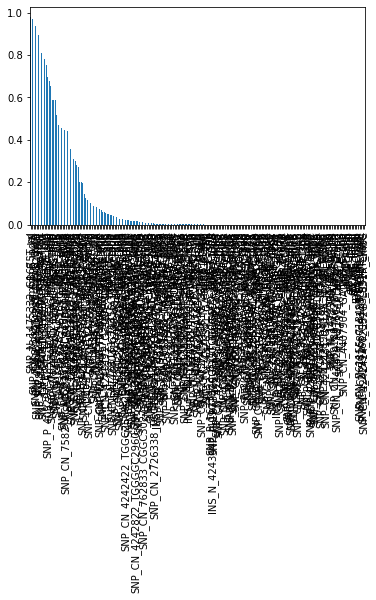

In [245]:
import seaborn as sns
p_values.plot.bar()

In [246]:
p_values_array = chi_scores[1]
p_values_array

array([3.88289041e-02, 7.83869166e-01, 1.27019459e-01, 3.07775874e-01,
       2.39947892e-08, 5.24967502e-04, 4.44333149e-03, 5.47412343e-05,
       1.28513342e-07, 4.90840403e-06, 8.81791048e-04, 3.23827152e-03,
       4.89554979e-04, 3.36661610e-01, 5.86902094e-01, 1.85459326e-02,
       3.55559493e-01, 1.78246622e-02, 2.76333835e-07, 7.90913869e-77,
       5.94973562e-03, 1.26604236e-02, 1.05710624e-14, 7.77588351e-04,
       9.87473319e-04, 1.93942083e-22, 6.36193139e-08, 4.59104600e-07,
       1.95803482e-06, 1.84329900e-02, 3.81629065e-03, 1.18756866e-07,
       1.74401546e-09, 4.81662283e-03, 1.10739980e-05, 2.49473243e-06,
       8.10358672e-13, 7.65559251e-03, 7.46971020e-03, 1.18820943e-06,
       5.86902094e-01, 5.44162350e-08, 6.64435632e-02, 5.76625721e-09,
       1.57776636e-05, 2.49881275e-02, 5.94548316e-02, 3.06447858e-09,
       2.74447356e-02, 7.96055272e-01, 8.93677876e-01, 9.37172960e-01,
       5.46605515e-02, 3.06447858e-09, 2.83423947e-07, 2.08572221e-02,
      

In [247]:
p_values_array.shape

(219,)

In [248]:
columns = X.columns
columns

Index(['DEL_CF_410280_d918T_307_iniB', 'DEL_CF_4408101_d102C_34_gid',
       'DEL_F_4408101_d101C_gid_G34G', 'INS_CF_4242820_i2957G_986_embC',
       'INS_F_409772_i410ATCT_iniB_G137G', 'INS_F_4247020_i506CC_embB_G169G',
       'INS_F_4247970_i1456GT_embB_G486G',
       'INS_N_4243642_i409GTCCCGGGGCGCCAC_embA_S137S',
       'INS_P_3074519_G.117_thyA', 'INS_P_3074521_G.115_thyA',
       ...
       'thyA_C_snp', 'ahpC_NC_snp', 'ahpC_C_snp', 'gid_C_snp', 'iniA_C_snp',
       'gyrB_F_indel', 'embC_C_snp', 'eis_NC_snp', 'rpsA_C_snp',
       'rrl-rrs_NC_snp'],
      dtype='object', length=219)

In [249]:
columns_to_remove = []

for i in range(len(p_values_array)):
  if p_values_array[i] > 0.05:
    columns_to_remove.append(columns[i])

columns_to_remove


['DEL_CF_4408101_d102C_34_gid',
 'DEL_F_4408101_d101C_gid_G34G',
 'INS_CF_4242820_i2957G_986_embC',
 'SNP_CN_1674952_C751G_P251A_inhA',
 'SNP_CN_2102891_A152G_F51S_ndh',
 'SNP_CN_2154613_TC_katG_Q500R',
 'SNP_CN_409561_C200G_A67G_iniB',
 'SNP_CN_409675_G314A_S105N_iniB',
 'SNP_CN_412017_C1180G_Q394E_iniA',
 'SNP_CN_414041_T1285G_S429A_iniC',
 'SNP_CN_414042_CG_iniC_S429W',
 'SNP_CN_414182_C1426T_R476C_iniC',
 'SNP_CN_4240172_G310A_V104M_embC',
 'SNP_CN_4242182_G2320T_A774S_embC',
 'SNP_CN_4242822_T2960G_V987G_embC',
 'SNP_CN_4247730_G1217A_G406D_embB',
 'SNP_CN_4326439_G1035T_N345K_ethA',
 'SNP_CN_4408156_A47C_L16R_gid',
 'SNP_CN_4408175_C28G_A10P_gid',
 'SNP_CN_7362_G61C_E21Q_gyrA',
 'SNP_CN_7539_A238G_T80A_gyrA',
 'SNP_CN_7582_ACAG281-284GCAC_DS94-95GT_gyrA',
 'SNP_CN_7585_G284C_S95T_gyrA',
 'SNP_CN_761140_A1334G_H445R_rpoB',
 'SNP_CN_761277_A1471T_I491F_rpoB',
 'SNP_CN_762249_C2443G_L815V_rpoB',
 'SNP_CN_9304_G2003A_G668D_gyrA',
 'SNP_I_410806_C32G_inter_iniB_iniA',
 'SNP_I_7268_C34

In [250]:
len(columns_to_remove)

52

In [251]:
new_df = df.drop(columns_to_remove, axis=1)
new_df.shape

(2081, 168)

In [252]:
new_df

,DEL_CF_410280_d918T_307_iniB,INS_F_409772_i410ATCT_iniB_G137G,INS_F_4247020_i506CC_embB_G169G,INS_F_4247970_i1456GT_embB_G486G,INS_N_4243642_i409GTCCCGGGGCGCCAC_embA_S137S,INS_P_3074519_G.117_thyA,INS_P_3074521_G.115_thyA,SNP_CN_1673449_A10C_T4P_fabG1,SNP_CN_1674263_T62C_I21T_inhA,SNP_CN_1674481_T280G_S94A_inhA,SNP_CN_2102990_A53G_V18A_ndh,SNP_CN_2154724_C1388A_R463L_katG,SNP_CN_2155167_GT_katG_S315R,SNP_CN_2155168_C944G_S315T_katG,SNP_CN_2155168_C944T_S315N_katG,SNP_CN_2155276_CT_katG_G279D,SNP_CN_2289040_AC_pncA_W68G,SNP_CN_2289090_TC_pncA_H51R,SNP_CN_2289099_TG_pncA_K48T,SNP_CN_2289180_A62C_V21G_pncA,SNP_CN_2289202_A40G_C14R_pncA,SNP_CN_2518836_AC_kasA_E241A,SNP_CN_2518839_CT_kasA_A242V,SNP_CN_2518919_G805A_G269S_kasA,SNP_CN_2519048_G934A_G312S_kasA,SNP_CN_2726051_G37A_L13F_oxyR',SNP_CN_2726338_T146G_V49G_ahpC,SNP_CN_2726338_TGGT146-149GGGG_VV49-50GG_ahpC,SNP_CN_2726350_G158T_W53L_ahpC,SNP_CN_2726409_GC_ahpC_D73H,SNP_CN_2726737_A545C_D182A_ahpC,SNP_CN_3073805_CA_thyA_E223*,SNP_CN_3073868_T604C_T202A_thyA,SNP_CN_3074465_GC_thyA_P3A,SNP_CN_409569_GA_iniB_A70T,SNP_CN_409770_GC_iniB_G137R,SNP_CN_410244_GC_iniB_V295L,SNP_CN_410560_A1199C_N400T_iniB,SNP_CN_412280_T1443G_H481Q_iniA,SNP_CN_412689_AG_iniA_S618G,...,embC_F_indel,rpsA_NC_indel,fabG1_C_snp,rrs_NF_indel,rpsA_F_indel,gid_F_indel,tlyA_C_snp,eis_F_indel,gyrA_C_snp,ethA_F_indel,pncA_C_snp,eis_NC_indel,ethA_C_snp,iniB_F_indel,eis_C_snp,embA-embB_NC_snp,alr_C_snp,rpsA_NF_indel,ddl_C_snp,embB_C_snp,embA_C_snp,kasA_C_snp,rpoB_C_snp,iniC_C_snp,gyrB_C_snp,eis_NF_indel,kasA_NF_indel,pncA_F_indel,fabG1-inhA_NC_snp,rpsA_NC_snp,embA_F_indel,thyA_C_snp,ahpC_NC_snp,gid_C_snp,iniA_C_snp,embC_C_snp,eis_NC_snp,rpsA_C_snp,rrl-rrs_NC_snp,STR
0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,1,0,1,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,1,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1
2,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,1,0,1,1,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2076,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2077,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2078,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2079,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [253]:
new_df.to_csv('X_trainData_chi_squared_STR.csv',index=False)